## 뉴스를 이용한 워드 클라우드 제작

### 데이터 확인

In [2]:
import pandas as pd
import numpy as np

In [7]:
df_bosa = pd.read_csv("./csv/bosa_news.csv")
df_bosa.head()

,_id,news_title,news_url,news_when,news_topic
0,65e6be0c3cd41b2567398195,"한국쿄와기린, 세계 희귀질환의 날 행사 참여",http://www.bosa.co.kr/news/articleView.html?id...,02.29 11:57,다국적제약/의료기기
1,65e6be0c3cd41b2567398196,"광동제약, ‘세계 희귀질환의 날’ 기념 환아 작품 전시회 개최",http://www.bosa.co.kr/news/articleView.html?id...,02.29 10:52,제약산업
2,65e6be0c3cd41b2567398197,"순천향대 부천병원 신영림 교수, ‘질병관리청장 표창’ 수상",http://www.bosa.co.kr/news/articleView.html?id...,02.29 10:29,동정
3,65e6be0d3cd41b2567398198,"창립 70주년 한독, ‘THANKS CAMPAIGN’ 실시",http://www.bosa.co.kr/news/articleView.html?id...,02.29 10:07,제약산업
4,65e6be0d3cd41b2567398199,[세계 희귀질환의 날] 국가‧사회‧이웃‧의료진‧가족 함께 가야 한다,http://www.bosa.co.kr/news/articleView.html?id...,02.29 05:50,학회/학술


In [8]:
df_bosa.isnull().sum()

_id           0
news_title    1
news_url      0
news_when     0
news_topic    0
dtype: int64

In [10]:
df_bosa.dropna(subset='news_title', inplace=True)

In [12]:
df_bosa.reset_index(inplace=True)

In [13]:
df_bosa_test1 = df_bosa.copy()
df_bosa_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425 entries, 0 to 2424
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       2425 non-null   int64 
 1   _id         2425 non-null   object
 2   news_title  2425 non-null   object
 3   news_url    2425 non-null   object
 4   news_when   2425 non-null   object
 5   news_topic  2425 non-null   object
dtypes: int64(1), object(5)
memory usage: 113.8+ KB


### 토큰화

In [90]:
stopwords = ['희귀질환', '병원', '치료', '의료']
f=open('./csv/korean_stopwords_basic.txt')
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()

In [91]:
from konlpy.tag import Okt
okt = Okt()
def tokenizer(raw, pos=['Noun', 'Verb'], stopword=stopwords):
    return [
        word for word, tag in okt.pos(raw, norm=True, stem=True)
        if len(word) >1 and tag in pos and word not in stopword
    ]

In [92]:
news_title_array = df_bosa_test1['news_title'][101:210].values
news_title_text = ' '.join(news_title_array)
news_title_text = tokenizer(news_title_text)
news_title_text = ' '.join(news_title_text)

### 워드 클라우드 만들기

In [93]:
!pip install wordcloud

In [94]:
!ls /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf # 한국어 폰트

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [95]:
from wordcloud import WordCloud
from collections import Counter
wordCloud = WordCloud(background_color='white'
                      , font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_text(news_title_text)

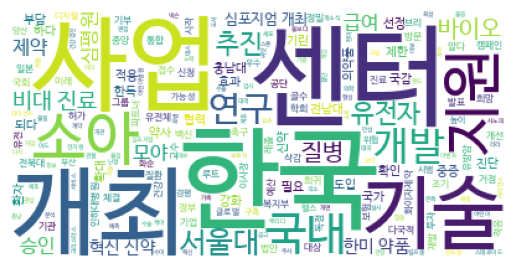

In [96]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [97]:
### 앵그램
def find_anagrams(text):
    words=text.split()